In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('/content/sentimentdataset.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [ ]:
print(df.head())
print(df.columns)


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [ ]:
import re

def clean_text(text):
    text = str(text).lower()                             # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove links
    text = re.sub(r'@\w+|\#', '', text)                  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)                  # Remove punctuation
    text = re.sub(r'\d+', '', text)                      # Remove numbers
    return text

df['clean_text'] = df['Text'].apply(clean_text)


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['clean_text'].apply(vader_sentiment)

# Preview results
print(df[['clean_text', 'sentiment']].head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00
                                          clean_text sentiment
0   enjoying a beautiful day at the park         ...  Positive
1   traffic was terrible this morning            ...  Negative
2   just finished an amazing workout                  Positive
3   excited about the upcoming weekend getaway   ...  Positive
4   trying out a new recipe for dinner tonight   ...   Neutral


In [ ]:
import re

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text))

# Create a new column with list of hashtags
df['hashtags'] = df['Text'].apply(extract_hashtags)


In [ ]:
# Flatten the list of hashtags into a single list
all_hashtags = [tag.lower() for sublist in df['hashtags'] for tag in sublist]


In [ ]:
from collections import Counter

# Count occurrences
hashtag_counts = Counter(all_hashtags)

# Get the top 20 hashtags
top_hashtags = hashtag_counts.most_common(20)

# Convert to DataFrame for visualization
import pandas as pd
hashtags_df = pd.DataFrame(top_hashtags, columns=['hashtag', 'count'])
print(hashtags_df)

                  hashtag  count
0      seniorphotographer      3
1                teenlife      2
2       naturephotography      2
3            seniordancer      2
4               teencrush      1
5             stealthmode      1
6     movienightstruggles      1
7            teenproblems      1
8             selfiequeen      1
9               teenvibes      1
10       headphonemystery      1
11  procrastinationnation      1
12        teenconfessions      1
13           weekendvibes      1
14          teenstruggles      1
15    groupprojectsuccess      1
16       teenachievements      1
17   masterchefintraining      1
18              teenhumor      1
19         classcountdown      1


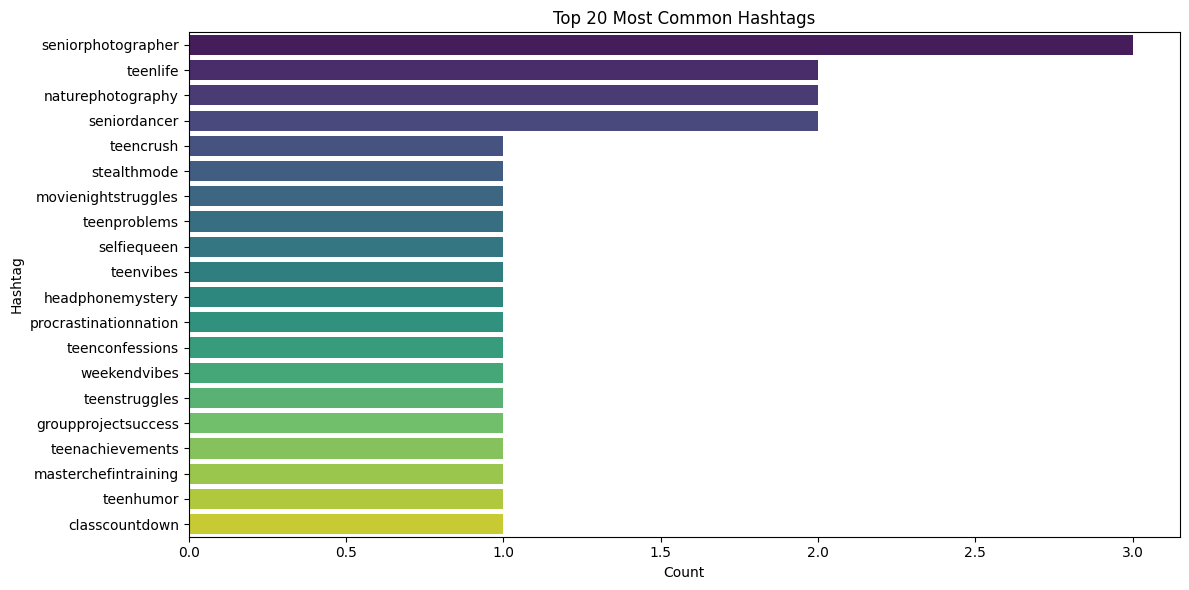

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=hashtags_df, x='count', y='hashtag', hue='hashtag', legend=False, palette='viridis')
plt.title("Top 20 Most Common Hashtags")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.tight_layout()
plt.show()

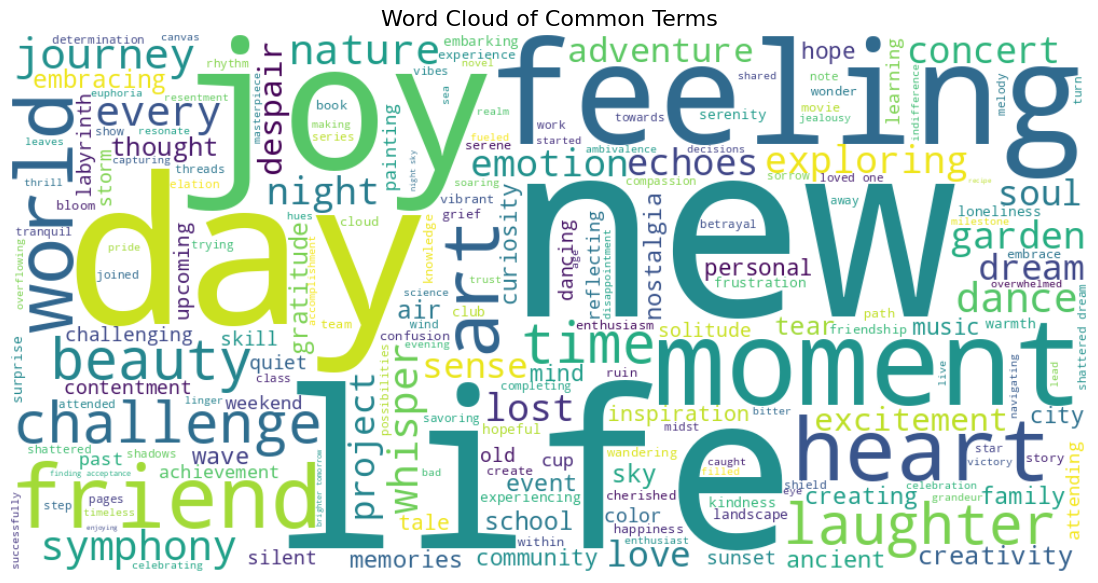

In [ ]:
from wordcloud import WordCloud

text_all = ' '.join(df['clean_text'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_all)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Common Terms", fontsize=16)
plt.show()


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Drop rows where timestamp couldn't be parsed
df = df.dropna(subset=['Timestamp'])


In [ ]:
df['date'] = df['Timestamp'].dt.date

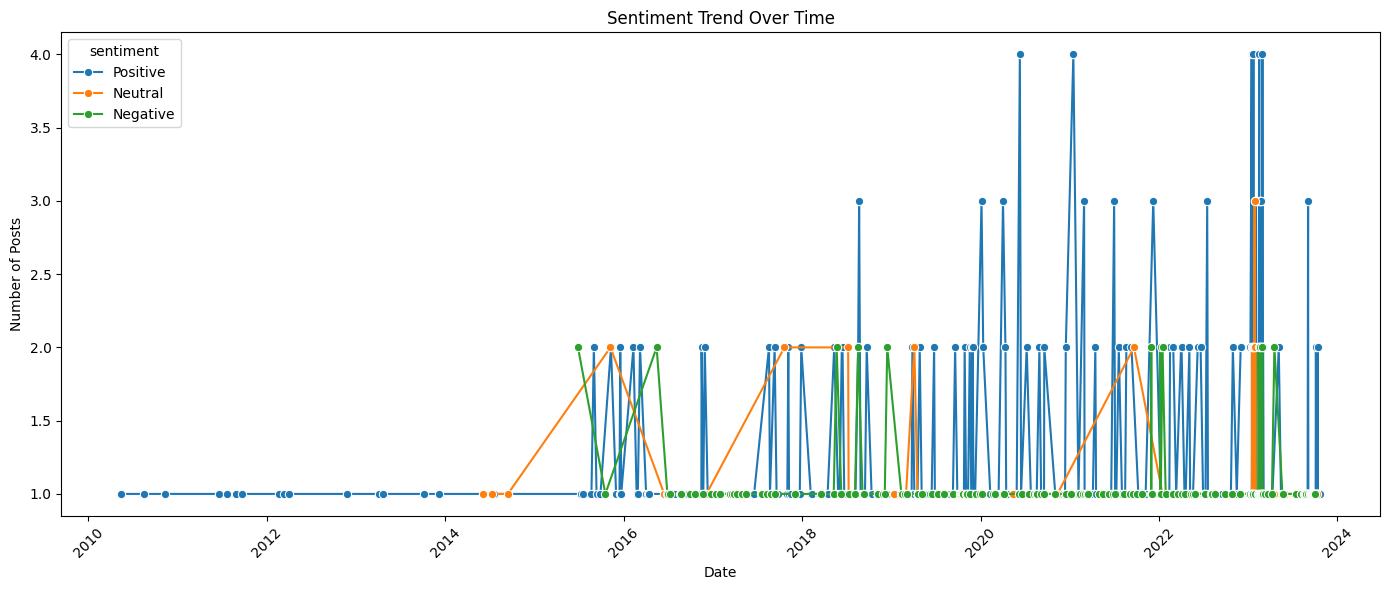

In [ ]:
# Aggregate data to get sentiment counts per day
trend_df = df.groupby(['date', 'sentiment'])['Text'].count().reset_index(name='count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_df, x='date', y='count', hue='sentiment', marker='o')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
sentiment_map = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['hour'] = df['Timestamp'].dt.hour


In [ ]:
hourly_score = df.groupby('hour')['sentiment_score'].mean().reset_index()
hourly_score.columns = ['hour', 'avg_sentiment_score']


In [ ]:
df['sentiment'] = df['sentiment'].str.strip().str.lower()

sentiment_map = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

In [ ]:
print(df['hour'].value_counts().sort_index())

hour
0      1
2      1
3      3
5      1
6      4
7      7
8     23
9     28
10    30
11    37
12    38
13    30
14    94
15    47
16    69
17    48
18    65
19    75
20    50
21    41
22    33
23     7
Name: count, dtype: int64


In [ ]:
hourly_score = df.groupby('hour')['sentiment_score'].mean().reset_index()
hourly_score.rename(columns={'sentiment_score': 'avg_sentiment_score'}, inplace=True)
print(hourly_score.head())


   hour  avg_sentiment_score
0     0             1.000000
1     2            -1.000000
2     3             0.333333
3     5             1.000000
4     6             1.000000


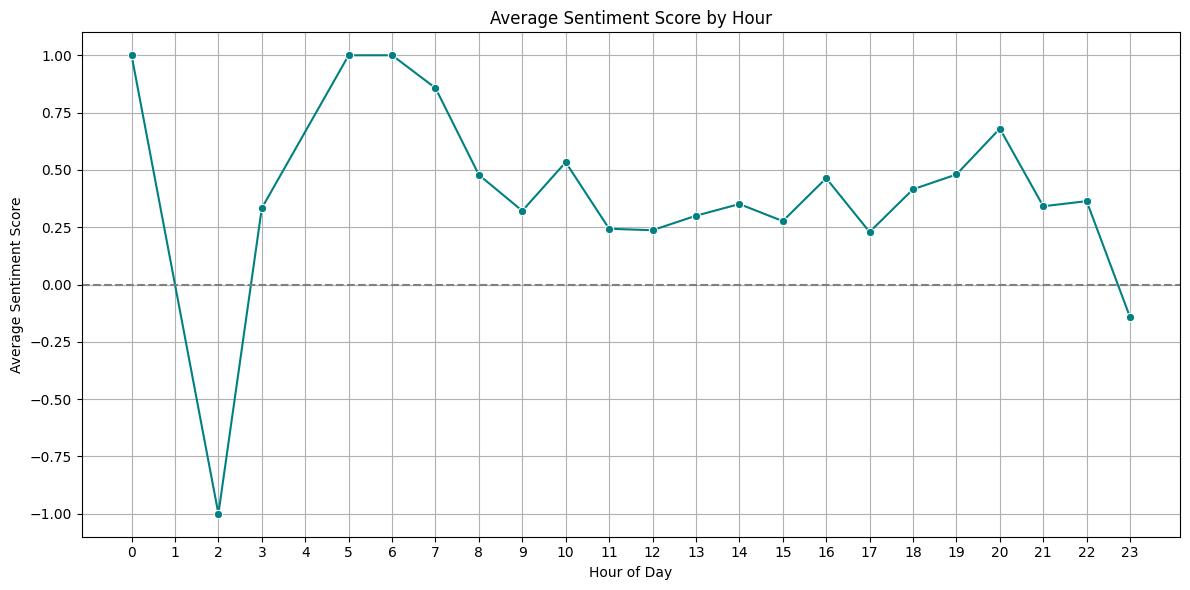

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_score, x='hour', y='avg_sentiment_score', marker='o', color='teal')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Average Sentiment Score by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Sentiment Score")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
sentiment_platform = df.groupby(['Platform', 'sentiment']).size().reset_index(name='count')
print(sentiment_platform.head())

      Platform sentiment  count
0    Facebook   negative     55
1    Facebook    neutral     22
2    Facebook   positive    154
3   Instagram   negative     61
4   Instagram    neutral     31


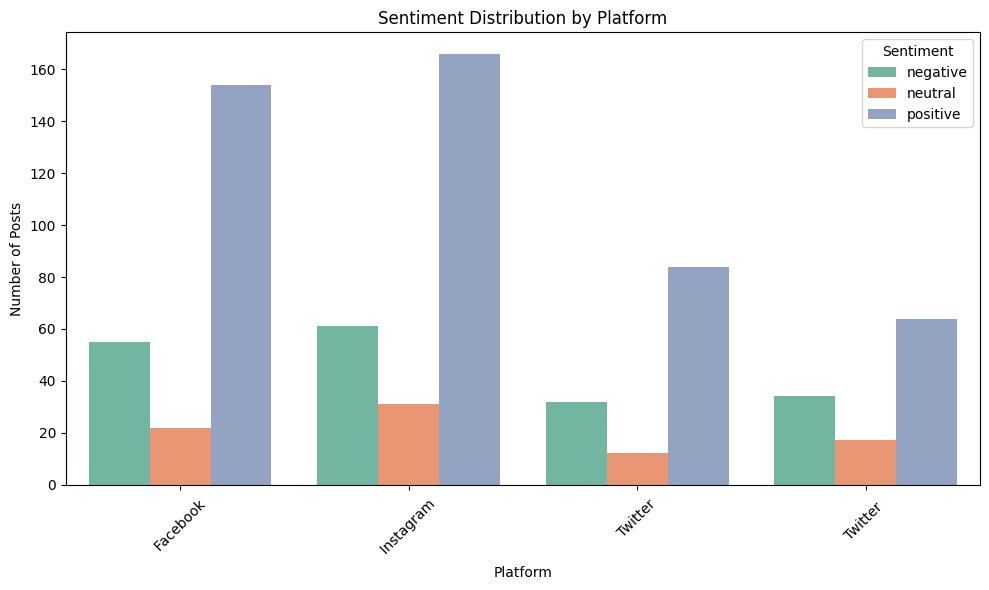

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_platform, x='Platform', y='count', hue='sentiment', palette='Set2')

plt.title("Sentiment Distribution by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


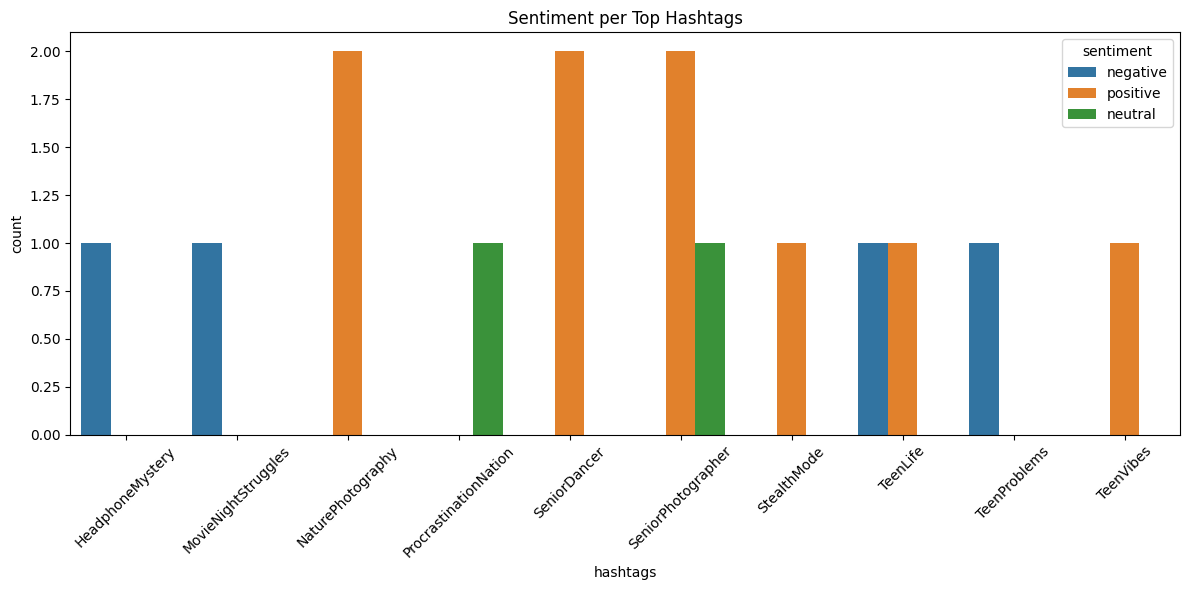

In [ ]:
# Explode hashtags column (from earlier)
df_exploded = df.explode('hashtags')

# Group by hashtag and sentiment
hashtag_sentiment = df_exploded.groupby(['hashtags', 'sentiment']).size().reset_index(name='count')

# Top 10 hashtags only (optional)
top_hashtags = df_exploded['hashtags'].value_counts().head(10).index
filtered = hashtag_sentiment[hashtag_sentiment['hashtags'].isin(top_hashtags)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x='hashtags', y='count', hue='sentiment')
plt.xticks(rotation=45)
plt.title("Sentiment per Top Hashtags")
plt.tight_layout()
plt.show()

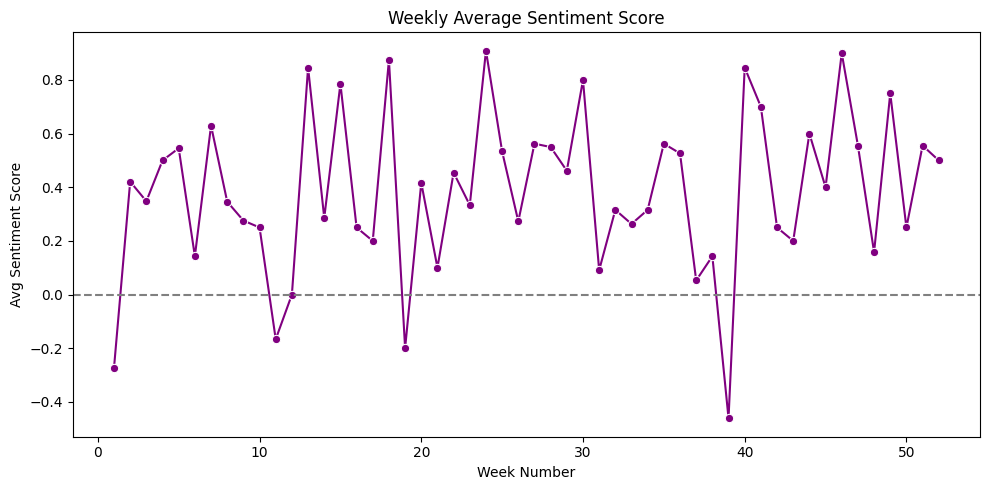

In [ ]:
# Ensure datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Create 'week' column
df['week'] = df['Timestamp'].dt.isocalendar().week

# Group and calculate average sentiment score by week
weekly_avg_score = df.groupby('week')['sentiment_score'].mean().reset_index()

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=weekly_avg_score, x='week', y='sentiment_score', marker='o', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Weekly Average Sentiment Score")
plt.xlabel("Week Number")
plt.ylabel("Avg Sentiment Score")
plt.tight_layout()
plt.show()


In [ ]:
# Export this to CSV for Tableau
# Convert the Index to a DataFrame first
pd.DataFrame(top_hashtags, columns=['hashtag']).to_csv('top_hashtags.csv', index=False)